# Réalisez une analyse exploratoire de donnees

### PCA 
* La <b>variabilité entre les individus</b>, c'est-à-dire quelles sont les différences et les ressemblances entre individus.
* Les <b>liaisons entre les variables</b> : y a-t-il des groupes de variables très corrélées entre elles qui peuvent être regroupées en de nouvelles variables synthétiques ?
* <b>Fonctionnement</b> : on cherche une projection des données sur des axes principaux d'interties. Ces axes forment de nouvelles variables, combinaisons linéares des variables. 
* <b>Centrer et réduire</b> : si var(x1)=6.25 et var(x2)=0.5 alors x1 sera l'axe principale d'intertie et cela n'a aucun intérêt.
* Démo PCA : <a href="https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5278610-decouvrez-les-espaces-que-nous-utiliserons#/id/r-5469160">openclassroom</a>
* <b>Cercle des corrélations</b> pour étudier les liaisons entre les variables. Il s'agit de la projection du nuage des variables sur le premier plan factoriel (les deux premiers axes d'inertie).

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('datasets/my_courses.csv',index_col='titreCours')

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.values[:,:8])

In [3]:
X_scaled = pd.DataFrame(data=X_scaled,columns=data.columns[:8], index=data.index).fillna(0)

from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_projected = pca.fit_transform(X_scaled)

In [4]:
X_projected = pd.DataFrame(X_projected,index=data.index, columns=['F'+str(i+1) for i in range(8)])
X_projected

,F1,F2,F3,F4,F5,F6,F7,F8
titreCours,,,,,,,,
Classez_et_segmentez_des_données_visuelles,-0.748855,-1.324834,-0.487026,-1.155371,-1.024546,0.272102,0.473067,-0.159866
Initiez-vous_à_la_statistique_inférentielle,0.348992,0.111261,-1.117079,-0.853226,0.431761,-0.892205,0.899015,-0.293297
Découvrez_les_librairies_Python_pour_la_Data_Science,-2.714357,-0.634562,2.595529,-0.608405,0.311781,0.250853,-0.003561,-0.152044
Devenez_mentor_sur_OpenClassrooms,-2.428207,2.120453,-1.389445,0.271877,0.426640,1.079811,-0.242579,-0.149193
Initiez-vous_à_l'algèbre_relationnelle_avec_le_langage_SQL,0.858893,0.277280,0.799563,-0.814382,0.524173,-0.007581,0.244991,0.029575
Entraînez_un_modèle_prédictif_linéaire,-1.852801,-1.087054,-0.700196,0.925481,0.441909,-0.428280,-0.227284,-0.068337
Explorez_vos_données_avec_des_algorithmes_non_supervisés,-0.768331,-1.767238,-1.087569,0.516295,-0.515927,0.922470,0.392542,0.196892
Décrivez_et_nettoyez_votre_jeu_de_données,0.782677,1.173146,0.468190,-1.356551,-0.292982,-0.077042,0.232303,0.530970
Créez_votre_Data_Lake,-1.860890,-0.456328,0.142438,0.220872,-0.281442,-0.683605,-0.322906,0.174406


In [5]:
f1 = pca.components_[0]
print('f1 est une combinaison des 8 variables:',f1)

f1 est une combinaison des 8 variables: [ 0.3493481  -0.43074276 -0.08604947  0.47322442  0.16559495  0.46967227
  0.13203259  0.44229444]


In [6]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d_95 = np.argmax(cumsum>0.95) + 1 
print('Il faut',d_95,'dimensions pour garder 95% de la variance')

Il faut 6 dimensions pour garder 95% de la variance


## Analyse des composantes

$\text{Contribution}(i,s) = \frac{ \text{inertie projetée du point } i \text{ sur } s }{ \text{inertie projetée de } N_I \text{ sur } s } = \frac{p_i(OH_i^s)^2}{\lambda_s}$

Pourcentage d'intertie : $Qlt(i,s) = \frac{(OH_i^s)^2}{(OM_i)^2} = cos^2(\overrightarrow{OM_i},u_s)$

<b>Choix des composantes</b> : 
* On choisit celles qui expliquent le plus les données. On a tendance à ne pas analyser une variable associée à une inertie inférieure à (100/p)% car elle représente moins qu'une variable initiale. Lorsque toutes les variables de sont indépendantes deux à deux cad (100/p)%, c'est le <b>critère de Kaiser</b>.
* <b>Méthode du Coude</b>, comme la méthode Elbow donc où le pourcentage d'inertie (variance expliquée) commence à diminuer beacoup plus lentement. 

In [7]:
from tools_fct.functions import *

In [8]:
n_comp = 6 
data = pd.read_csv('datasets/my_courses.csv',decimal=".",index_col=0)

In [9]:
data_pca = data[data.columns[:8]]
data_pca.fillna(data_pca.mean(),inplace=True)

X = data_pca.values
names = data['idCours']

features = data_pca.columns

# Centrage et Réduction
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

C:\Users\clmen\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

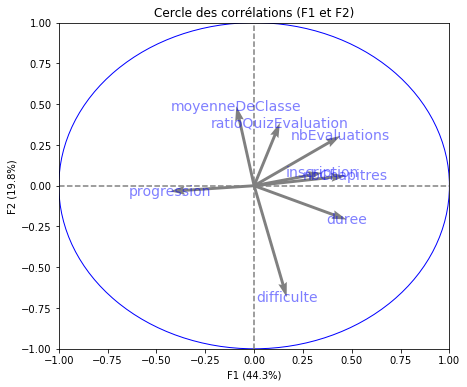

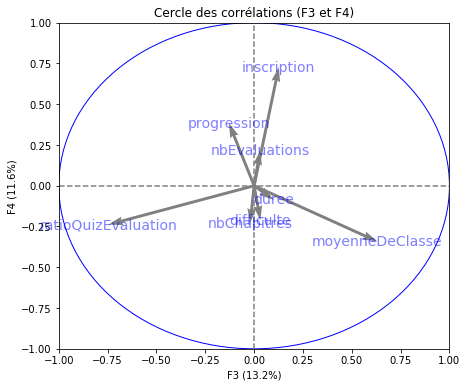

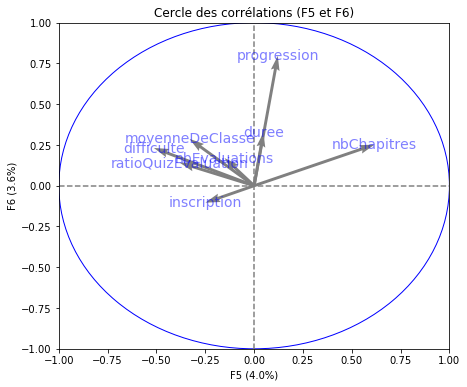

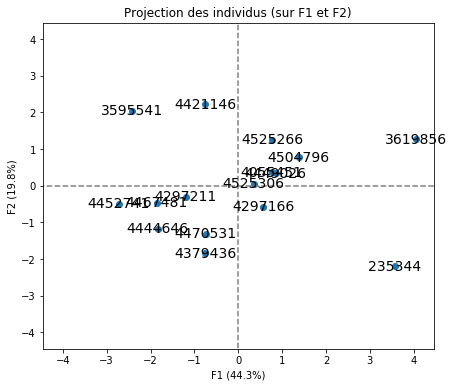

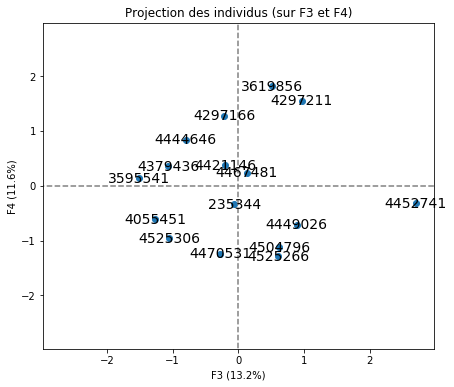

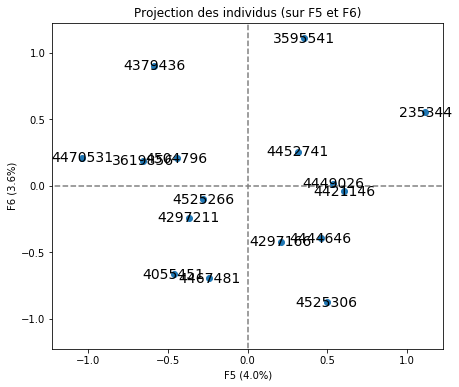

In [10]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

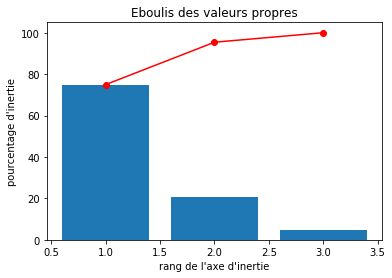

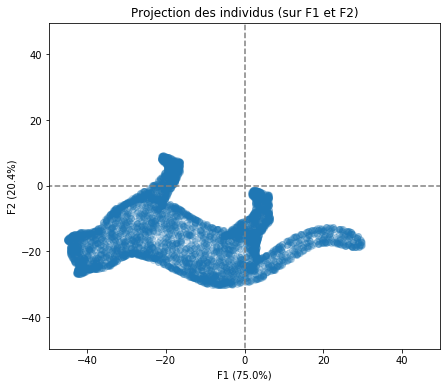

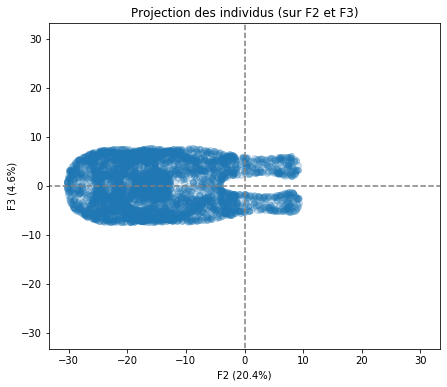

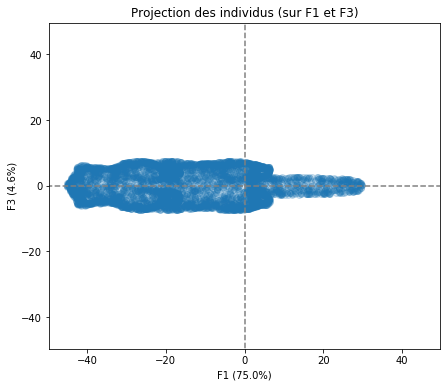

In [11]:
n_comp = 3

data = pd.read_csv('datasets/mystery.csv')
X = data.values 

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité. 
# On se contente juste de centrer les données, ce qui est obligatoire pour une ACP.
scaler = StandardScaler(with_std=False)
X_scaled = scaler.fit_transform(X)

pca = PCA(n_comp)
pca.fit(X_scaled)

display_scree_plot(pca)

X_projected = pca.transform(X)
display_factorial_planes(X_projected,n_comp,pca,[(0,1),(1,2),(0,2)], alpha = 0.2)

plt.show()

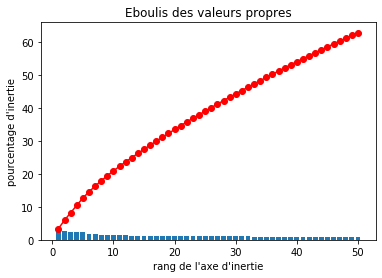

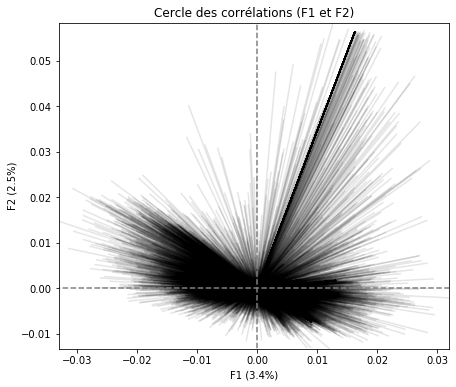

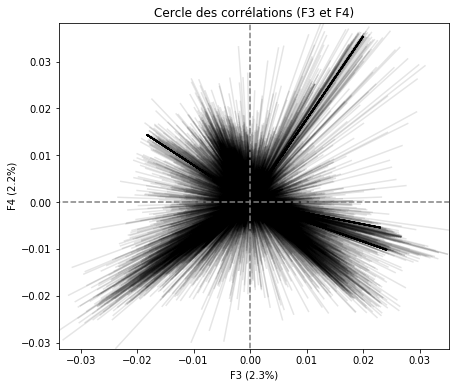

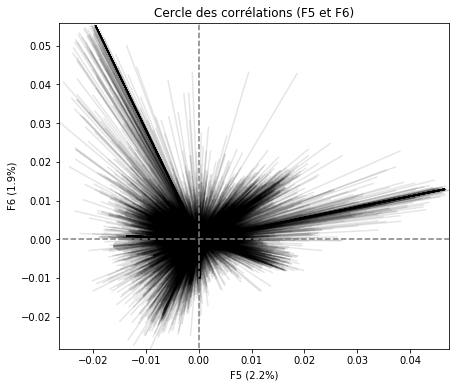

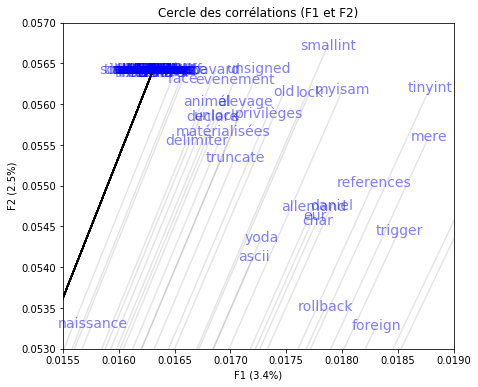

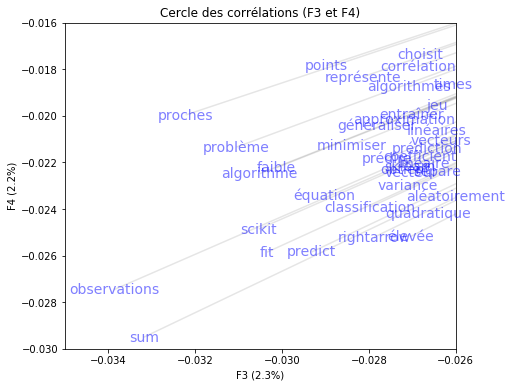

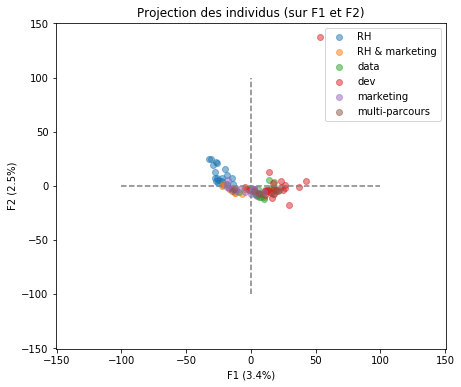

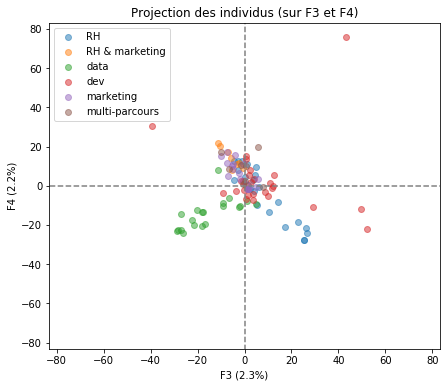

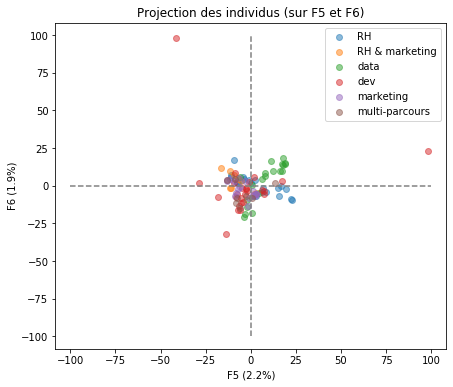

In [12]:
# choix du nombre de composantes à calculer
n_comp = 50

# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('datasets/bag_of_words.csv', index_col = 0)
courses_info = pd.read_csv('datasets/courses_info.csv',index_col = 0)

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour l'ACP
X = data.values
features = data.columns

# Centrage et Réduction
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)])
display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0155, .019, 0.053, .057], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.035, -.026, -.03,-.016], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = theme, alpha = 0.5)

plt.show()

## Partionnement - Clustering

* Inertie totale = inertie intraclasse + inertie interclasse
* <b>Clustering Hierarchique</b> : approche ascendante (agglomératif) ou descendante (divisif) 
* Visualisation du <b>Dendogramme</b> : arborescence de clusters mesuré par la distance inter-cluster.
* <b>Méthodes des liens</b> : Pour mesurer la distance inter-clusters on peut calculer le Lien simple (distance entre les deux points les + proches des clusters), le Lien moyen (moyenne des distances de toutes les paires de points des 2 clusters), le Lien complet (distance des deux points les + éloignés) ou le Lien centroidale (distance entre les deux centroides).
* <b>Méthode de Ward</b> : A chaque itération (regroupement de 2 clusters en 1), cherche à minimiser la distance interclasse
* Peut combiner K-Means + Clustering Hierarchique

In [18]:
data = pd.read_csv('datasets/bag_of_words.csv', index_col=0)
print(data.shape)
data.head()

(105, 9343)


,aaaa,abandonner,abattement,abbr,abc,abondement,abonnement,abonner,abonnés,aborder,...,évoqué,évoquées,évoqués,évènement,évènements,événement,événements,êtres,œil,œuvre
Concevez des architectures Big Data,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000469,0.000000,0.000000,0.000000
Apprenez à coder avec JavaScript,0.000000,0.0,0.0,0.0,0.000499,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0001,0.0,0.000000,0.000000,0.000000,0.000000
Concevez votre site web avec PHP et MySQL,0.000524,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000058,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000087,0.000000
Réussir sa campagne d'e-mailing avec MailChimp,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.020408,0.020408,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000
Utilisez des modèles supervisés non linéaires,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000325,0.000000,0.000651


In [19]:
courses_info = pd.read_csv('datasets/courses_info.csv',index_col=0)
print(courses_info.shape)
courses_info.head()

(112, 13)


,charge-e-de-gestion-des-ressources-humaines,manager-rh,gestionnaire-de-paie,data-architect,developpeur-se-dapplication-python,developpeur-web-junior,community-manager,responsable-marketing-operationnel,developpeur-se-d-application-php-symfony,data-scientist,expert-e-en-strategie-marketing-et-communication,data-analyst,theme
title,,,,,,,,,,,,,
Apprenez à gérer les conflits,True,True,True,False,False,False,False,False,False,False,False,False,RH
Réalisez des calculs distribués sur des données massives,False,False,False,True,False,False,False,False,False,False,False,False,data
Managez une équipe au quotidien,False,True,False,False,False,False,False,False,False,False,False,False,RH
Gérez votre code avec Git et GitHub,False,False,False,False,True,True,False,False,False,False,False,False,dev
Lancez une campagne de publicité avec Google AdWords,False,False,False,False,False,False,True,True,False,False,False,False,marketing


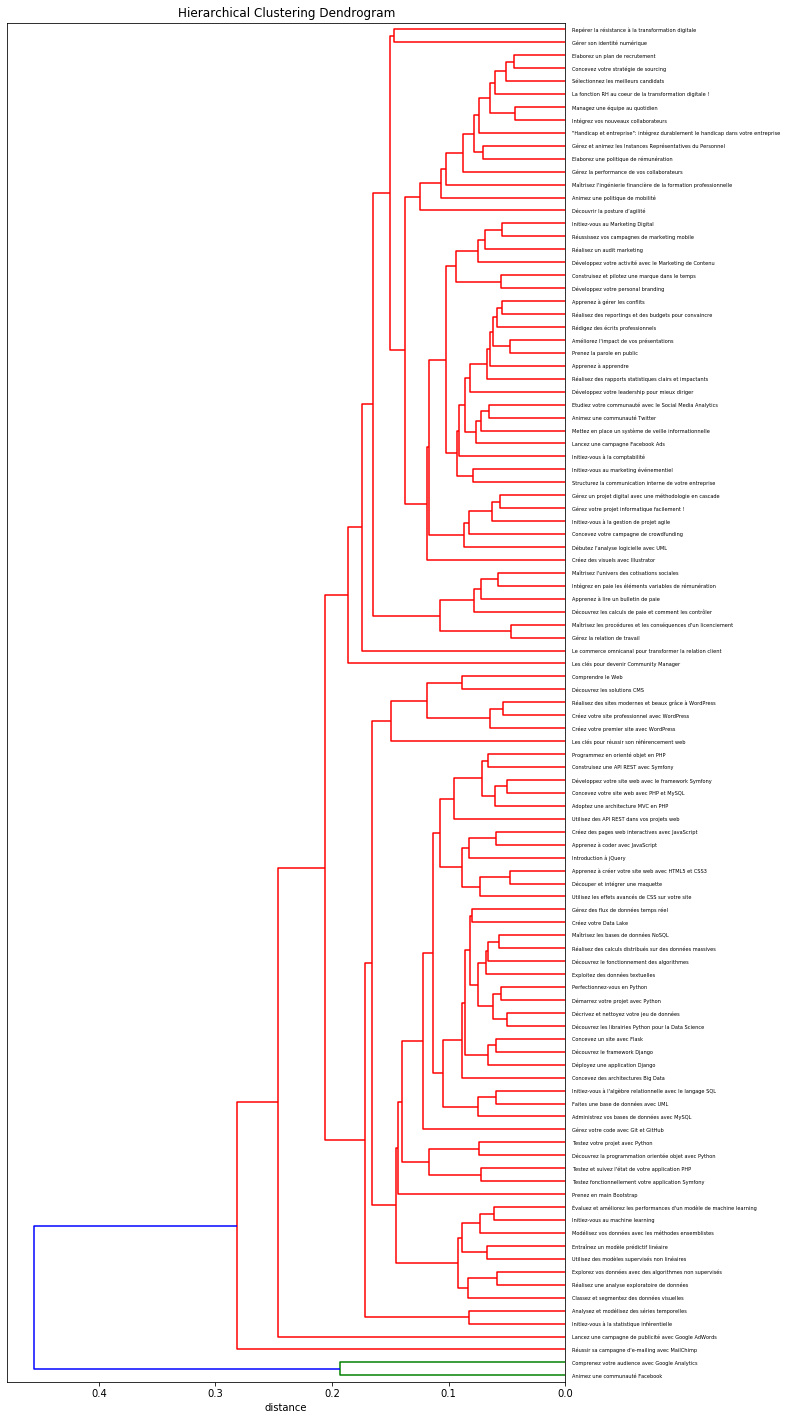

In [34]:
# store theme de chaque data row, present dans course_info
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

X = data.values
names = data.index

# centrage et reduction
std_scale = StandardScaler()
X_scaled = scaler.fit_transform(X)

from scipy.cluster.hierarchy import linkage,fcluster

# clustering hierarchique avec methode de Ward
Z = linkage(X_scaled,'ward')

plot_dendrogram(Z,names)

In [39]:
# coupe du dendogramme en 12 clusters : 
clusters = fcluster(Z, 12, criterion="maxclust")

# comparer les clusters avec la classification par thème : 
courses = pd.DataFrame({"theme":theme, "cluster":clusters,"title":names})
courses.pivot_table(index="theme",columns = "cluster", aggfunc = len, fill_value=0)

title                                   
cluster           1  2  3   4  5  6   7  8  9  10 11 12
theme                                                  
RH                 0  0  0   0  0  6  16  1  0  0  0  0
RH & marketing     1  0  0   0  0  0   8  1  0  0  0  0
data               0  0  2  17  0  0   1  0  0  0  0  0
dev                0  0  0  23  1  0   2  0  0  0  0  0
marketing          0  1  0   0  2  0  11  0  1  1  1  1
multi-parcours     0  0  0   3  3  0   2  0  0  0  0  0

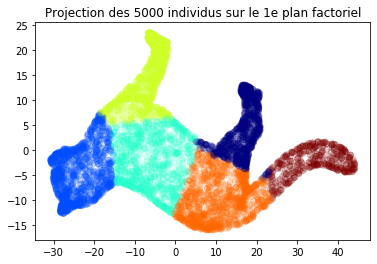

In [41]:
from sklearn.cluster import KMeans

# Nombre de clusters souhaités
n_clust = 6

# import de l'échantillon
data = pd.read_csv('datasets/mystery.csv')

# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

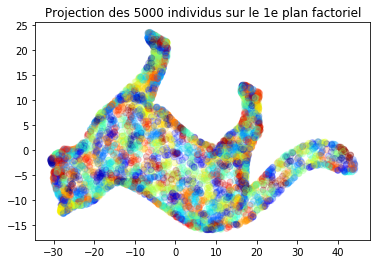

In [42]:
n_clust = 500 
# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

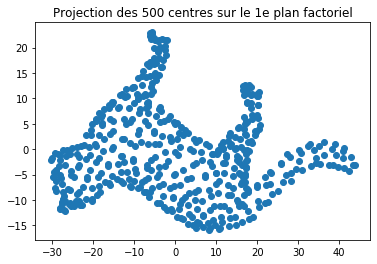

In [43]:
# Affichage des positions des centres de classes
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

Les 500 centroides suffisent à conserver la distribution (forme) les données